# Exploration of Articles dataset
This notebook contains the first data understanding performed on the articles dataset, as required for the first assignment

## Import libraries and dataset

In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# import dataset and create a copy to work with
df_art = pd.read_csv("../data/articles.csv")

In [3]:
df_art.head()

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
0,108775015,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,9,Black,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
1,108775044,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,10,White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
2,108775051,108775,Strap top (1),253,Vest top,Garment Upper body,1010017,Stripe,11,Off White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
3,110065001,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,9,Black,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."
4,110065002,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,10,White,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."


## General analysis

In [4]:
df_art.shape

(105542, 25)

In [5]:
# find colums with a unique value
nunique = df_art.nunique()
cols_uniquevalue = nunique[nunique == 1].sum()

print("In the dataframe there are", cols_uniquevalue, "colums with a unique value values")

In the dataframe there are 0 colums with a unique value values


In [6]:
# finding duplicates from the dataset
duplicated_values = df_art.duplicated().sum()

print("In the dataframe there are", duplicated_values, "duplicated values")

In the dataframe there are 0 duplicated values


In [7]:
#findin missing values
df_art.isna().any()

article_id                      False
product_code                    False
prod_name                       False
product_type_no                 False
product_type_name               False
product_group_name              False
graphical_appearance_no         False
graphical_appearance_name       False
colour_group_code               False
colour_group_name               False
perceived_colour_value_id       False
perceived_colour_value_name     False
perceived_colour_master_id      False
perceived_colour_master_name    False
department_no                   False
department_name                 False
index_code                      False
index_name                      False
index_group_no                  False
index_group_name                False
section_no                      False
section_name                    False
garment_group_no                False
garment_group_name              False
detail_desc                      True
dtype: bool

In [8]:
num_missing = df_art.detail_desc.isna().sum()
print("The number of missing values in detail_desc is", num_missing)

The number of missing values in detail_desc is 416


## Checking numeric variables

In [9]:
#check max values of numeric variables only
df_art.max(numeric_only=True)

article_id                    959461001
product_code                     959461
product_type_no                     762
graphical_appearance_no         1010029
colour_group_code                    93
perceived_colour_value_id             7
perceived_colour_master_id           20
department_no                      9989
index_group_no                       26
section_no                           97
garment_group_no                   1025
dtype: int64

In [10]:
#check min values of numeric variables only
df_art.min(numeric_only=True)

article_id                    108775015
product_code                     108775
product_type_no                      -1
graphical_appearance_no              -1
colour_group_code                    -1
perceived_colour_value_id            -1
perceived_colour_master_id           -1
department_no                      1201
index_group_no                        1
section_no                            2
garment_group_no                   1001
dtype: int64

In [11]:
#it is possible that -1 values are actually nan, i'll check how many they are

In [12]:
cols_suspectNan = ["product_type_no", "graphical_appearance_no", "colour_group_code", "perceived_colour_value_id","perceived_colour_master_id"]

for col in cols_suspectNan:
  num_min1 = df_art[df_art[col] == -1][col].abs().sum()
  print("The number of -1 in column", col, "is:", num_min1)
  print()


#we can see that for each column there is a different number of -1 values, let's check if there is a correlation

The number of -1 in column product_type_no is: 121

The number of -1 in column graphical_appearance_no is: 52

The number of -1 in column colour_group_code is: 28

The number of -1 in column perceived_colour_value_id is: 28

The number of -1 in column perceived_colour_master_id is: 685



In [13]:
#changing -1 values with nan
for col in cols_suspectNan:
  df_art[col] = np.where(df_art[col] == -1, np.nan, df_art[col])

df_art.isna().any()

article_id                      False
product_code                    False
prod_name                       False
product_type_no                  True
product_type_name               False
product_group_name              False
graphical_appearance_no          True
graphical_appearance_name       False
colour_group_code                True
colour_group_name               False
perceived_colour_value_id        True
perceived_colour_value_name     False
perceived_colour_master_id       True
perceived_colour_master_name    False
department_no                   False
department_name                 False
index_code                      False
index_name                      False
index_group_no                  False
index_group_name                False
section_no                      False
section_name                    False
garment_group_no                False
garment_group_name              False
detail_desc                      True
dtype: bool

In [14]:
df_art.dropna(subset=["product_type_no", "graphical_appearance_no", "colour_group_code", "perceived_colour_value_id", "perceived_colour_master_id" ], axis=0, inplace=True)

In [15]:
df_art.isna().any()

article_id                      False
product_code                    False
prod_name                       False
product_type_no                 False
product_type_name               False
product_group_name              False
graphical_appearance_no         False
graphical_appearance_name       False
colour_group_code               False
colour_group_name               False
perceived_colour_value_id       False
perceived_colour_value_name     False
perceived_colour_master_id      False
perceived_colour_master_name    False
department_no                   False
department_name                 False
index_code                      False
index_name                      False
index_group_no                  False
index_group_name                False
section_no                      False
section_name                    False
garment_group_no                False
garment_group_name              False
detail_desc                      True
dtype: bool

In [16]:
df_art.shape

(104712, 25)

## Categorical features analysis

### Garment group name

In [17]:
#which are the values
df_art["garment_group_name"].unique()

#we can see there is an unknown, so missing values
# there is also a "dressed" which can be dresses mispelled

array(['Jersey Basic', 'Under-, Nightwear', 'Socks and Tights',
       'Jersey Fancy', 'Accessories', 'Trousers Denim', 'Outdoor',
       'Shoes', 'Swimwear', 'Knitwear', 'Shirts', 'Trousers', 'Dressed',
       'Shorts', 'Dresses Ladies', 'Skirts', 'Special Offers', 'Blouses',
       'Unknown', 'Woven/Jersey/Knitted mix Baby', 'Dresses/Skirts girls'],
      dtype=object)

In [18]:
#how many are they
df_art["garment_group_name"].value_counts()

Jersey Fancy                     21219
Accessories                      11456
Jersey Basic                      8093
Knitwear                          7421
Under-, Nightwear                 7379
Trousers                          6669
Blouses                           5793
Shoes                             5139
Dresses Ladies                    4819
Outdoor                           4476
Unknown                           3812
Trousers Denim                    3071
Swimwear                          2771
Socks and Tights                  2263
Shirts                            2097
Woven/Jersey/Knitted mix Baby     1960
Shorts                            1542
Dresses/Skirts girls              1537
Skirts                            1249
Special Offers                    1051
Dressed                            895
Name: garment_group_name, dtype: int64

In [27]:
#substitute "Unknown" in the column with nan
# df_art["garment_group_name"] = np.where(df_art["garment_group_name"] == 'Unknown', np.nan, df_art["garment_group_name"])

In [ ]:
#check the number of nan, i'll see if I can replace them somehow
# df_art["garment_group_name"].isna().sum()

3812

In [19]:
# check if I can fill nan values in garment_no with garment_name
#create a dictionary with unique couples garment_no : garment_name
garment_couples = df_art[["garment_group_no", "garment_group_name"]].drop_duplicates().set_index("garment_group_no")["garment_group_name"].to_dict()

for chiave, valore in garment_couples.items():
  if valore == "Unknown":
    print(f"The values with Unknown names are: {chiave}")

#it seems that code 1001 is always with nan so i can't fill missing values this way

The values with Unknown names are: 1001


### Section Name

In [20]:
df_art["section_name"].value_counts()

Womens Everyday Collection        7157
Divided Collection                7112
Baby Essentials & Complements     4927
Kids Girl                         4456
Young Girl                        3883
Womens Lingerie                   3540
Girls Underwear & Basics          3480
Womens Tailoring                  3362
Kids Boy                          3300
Womens Small accessories          3259
Kids Outerwear                    2662
Womens Casual                     2652
Womens Trend                      2609
Divided Projects                  2358
Young Boy                         2347
H&M+                              2310
Men Underwear                     2309
Mama                              2248
Kids & Baby Shoes                 2140
Boys Underwear & Basics           2030
Womens Shoes                      2024
Ladies H&M Sport                  1849
Womens Swimwear, beachwear        1825
Contemporary Smart                1766
Baby Girl                         1755
Divided Accessories      

In [21]:
df_art["section_name"].nunique()

56

### Index group name

In [22]:
df_art["index_group_name"].value_counts()

Ladieswear       39284
Baby/Children    34604
Divided          15090
Menswear         12409
Sport             3325
Name: index_group_name, dtype: int64

<Axes: >

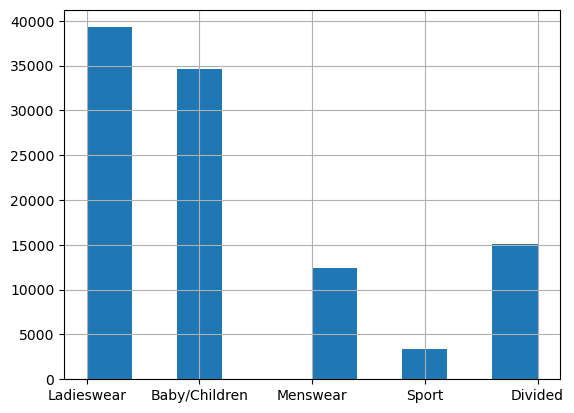

In [23]:
df_art["index_group_name"].hist()

In [63]:
# Divided is a fashion for young, teenagers who daring to try new style

### Prod name

In [24]:
df_art["prod_name"].unique()

array(['Strap top', 'Strap top (1)', 'OP T-shirt (Idro)', ...,
       'Cartwheel dress', 'CLAIRE HAIR CLAW', 'Lounge dress'],
      dtype=object)

In [25]:
df_art["prod_name"].value_counts()

Dragonfly dress          98
Mike tee                 71
Wow printed tee 6.99     68
1pk Fun                  55
TP Paddington Sweater    54
                         ..
Neo Relaxed Shorts        1
DIV Ren Lace body         1
Björn Slim Shorts         1
Texas straw hat           1
Lounge dress              1
Name: prod_name, Length: 45685, dtype: int64

In [26]:
df_art["prod_name"].nunique()
#maybe this can be a problem, cause a lot of values occur just once

45685

In [27]:
prod_names = df_art["prod_name"].value_counts()
prod_names_unique = prod_names[prod_names == 1]
print(len(prod_names_unique))

22922


In [28]:
# Check if "Unknown" value is in the column
if "Unknown" in df_art["prod_name"].unique():
    print("There's an Unknown value in the column")
else:
    print("There's not an Unknown value in the column")

There's not an Unknown value in the column


### Prod type name

In [29]:
df_art["product_type_name"].unique()

array(['Vest top', 'Bra', 'Underwear Tights', 'Socks', 'Leggings/Tights',
       'Sweater', 'Top', 'Trousers', 'Hair clip', 'Umbrella',
       'Pyjama jumpsuit/playsuit', 'Bodysuit', 'Hair string', 'Hoodie',
       'Sleep Bag', 'Hair/alice band', 'Belt', 'Boots', 'Bikini top',
       'Swimwear bottom', 'Underwear bottom', 'Swimsuit', 'Skirt',
       'T-shirt', 'Dress', 'Hat/beanie', 'Kids Underwear top', 'Shorts',
       'Shirt', 'Cap/peaked', 'Pyjama set', 'Sneakers', 'Sunglasses',
       'Cardigan', 'Gloves', 'Earring', 'Bag', 'Blazer', 'Other shoe',
       'Jumpsuit/Playsuit', 'Sandals', 'Jacket', 'Costumes', 'Robe',
       'Scarf', 'Coat', 'Other accessories', 'Polo shirt', 'Slippers',
       'Night gown', 'Alice band', 'Straw hat', 'Hat/brim',
       'Tailored Waistcoat', 'Necklace', 'Ballerinas', 'Tie',
       'Pyjama bottom', 'Felt hat', 'Bracelet', 'Blouse',
       'Outdoor overall', 'Watch', 'Underwear body', 'Beanie', 'Giftbox',
       'Sleeping sack', 'Dungarees', 'Outdoor t

In [30]:
df_art["product_type_name"].value_counts()

Trousers         11056
Dress            10272
Sweater           9221
T-shirt           7847
Top               4108
                 ...  
Keychain             1
Cushion              1
Blanket              1
Bra extender         1
Clothing mist        1
Name: product_type_name, Length: 130, dtype: int64

In [31]:
df_art["product_type_name"].nunique()

130

In [32]:
prod_types = df_art["product_type_name"].value_counts()
prod_types_unique = prod_types[prod_types == 1]
print(len(prod_types_unique))

12


In [33]:
# check if there is an unknown value
if "Unknown" in df_art["product_type_name"].unique():
    print("There's an unknown value in this column")
else:
    print("There's not an unknown value in this column")

There's not an unknown value in this column


### Prod group name

In [34]:
df_art["product_group_name"].unique()

array(['Garment Upper body', 'Underwear', 'Socks & Tights',
       'Garment Lower body', 'Accessories', 'Items', 'Nightwear',
       'Underwear/nightwear', 'Shoes', 'Swimwear', 'Garment Full body',
       'Cosmetic', 'Interior textile', 'Bags', 'Furniture',
       'Garment and Shoe care', 'Fun', 'Stationery'], dtype=object)

In [35]:
df_art["product_group_name"].value_counts()

Garment Upper body       42425
Garment Lower body       19622
Garment Full body        13192
Accessories              11110
Underwear                 5465
Shoes                     5277
Swimwear                  3111
Socks & Tights            2437
Nightwear                 1896
Underwear/nightwear         54
Cosmetic                    49
Bags                        25
Items                       17
Furniture                   13
Garment and Shoe care        9
Stationery                   5
Interior textile             3
Fun                          2
Name: product_group_name, dtype: int64

In [36]:
# check if I can fill nan values in garment_group_name with product_group_name
garment_product_couples = df_art[["product_group_name", "garment_group_name"]].drop_duplicates().set_index("product_group_name")["garment_group_name"].to_dict()

for chiave, valore in garment_product_couples.items():
  if valore == "Unknown":
    print(f"The values with Unknown names are: {chiave}")

#nan values have a match with Forniture, garment and shoe care, stationery: they're not clothes so maybe this is the reason the garment name was unknown

The values with Unknown names are: Furniture
The values with Unknown names are: Garment and Shoe care
The values with Unknown names are: Stationery


### Graphical appearance name

In [37]:
df_art["graphical_appearance_name"].value_counts()

Solid                  49413
All over pattern       17037
Melange                 5867
Stripe                  4951
Denim                   4796
Front print             3191
Placement print         3081
Check                   2149
Colour blocking         1813
Lace                    1503
Other structure         1484
Application/3D          1337
Embroidery              1156
Mixed solid/pattern     1129
Glittering/Metallic      955
Jacquard                 822
Sequin                   805
Dot                      680
Treatment                575
Other pattern            513
Contrast                 376
Metallic                 345
Chambray                 322
Slub                     153
Transparent               86
Mesh                      84
Neps                      66
Argyle                    15
Hologram                   8
Name: graphical_appearance_name, dtype: int64

### Colour group name

In [38]:
df_art["colour_group_name"].value_counts()
#maybe we should replace alle the "light/other colour" whith the name of the colour to make earier analysis

Black              22549
Dark Blue          12158
White               9359
Light Pink          5808
Grey                4432
Light Beige         3351
Blue                3300
Red                 3052
Light Blue          3010
Greenish Khaki      2766
Beige               2706
Off White           2642
Dark Grey           2530
Dark Red            2340
Dark Green          2105
Pink                2062
Light Grey          2011
Yellow              1645
Light Orange        1518
Yellowish Brown     1464
Gold                1376
Dark Beige          1081
Light Turquoise     1027
Light Yellow         984
Dark Orange          885
Dark Pink            817
Green                815
Orange               779
Other Pink           750
Silver               707
Light Green          681
Dark Yellow          574
Light Purple         551
Dark Turquoise       473
Turquoise            435
Dark Purple          314
Light Red            285
Greyish Beige        226
Other Yellow         225
Purple               182


### Perceived colour value name

In [39]:
df_art["perceived_colour_value_name"].value_counts()
#Undefined can be considered as nan, maybe it should be joined with medium

Dark            42362
Dusty Light     21985
Light           15550
Medium Dusty    12561
Bright           6441
Medium           5708
Undefined         105
Name: perceived_colour_value_name, dtype: int64

In [40]:
#check if I can fill undefined values with the code but not
perceived_colour_id_names_couples = df_art[["perceived_colour_value_name", "perceived_colour_value_id"]].drop_duplicates().set_index("perceived_colour_value_id")["perceived_colour_value_name"].to_dict()

for chiave, valore in perceived_colour_id_names_couples.items():
  if valore == "Undefined":
    print(f"The values with Unknown names are: {chiave}")

#id = 6 always matches with undefindes, so we can't fill nan values this way

The values with Unknown names are: 6.0


In [41]:
#check if I can fill undefined values with colour names but not
perceived_colour_names_couples = df_art[["perceived_colour_value_name", "colour_group_name"]].drop_duplicates().set_index("perceived_colour_value_name")["colour_group_name"].to_dict()

for chiave, valore in perceived_colour_names_couples.items():
  if chiave == "Undefined":
    print(f"The values with Unknown names are: {valore}")



The values with Unknown names are: Other


### Department name

In [42]:
df_art["department_name"].value_counts()

Jersey                             4543
Knitwear                           3460
Trouser                            2624
Blouse                             2339
Swimwear                           2060
                                   ... 
Jersey inactive from S.6              1
Woven bottoms inactive from S.7       1
Shirt Extended inactive from s1       1
EQ Divided Blue                       1
Accessories Other                     1
Name: department_name, Length: 249, dtype: int64

In [43]:
df_art["department_name"].unique()

array(['Jersey Basic', 'Clean Lingerie', 'Tights basic', 'Baby basics',
       'Casual Lingerie', 'Jersey', 'EQ & Special Collections',
       'Hair Accessories', 'Other items', 'Baby Nightwear',
       'Men Sport Woven', 'Men Sport Bottoms', 'Kids Boy Denim',
       'Shopbasket Socks', 'Socks', 'UW', 'Young Girl Jersey Basic',
       'Jacket Street', 'Belts', 'Divided Shoes', 'Swimwear',
       'Underwear Jersey', 'Basic 1', 'Tops Knitwear DS', 'Men Sport Acc',
       'Kids Boy Jersey Basic', 'Young Girl UW/NW', 'Shirt', 'Nightwear',
       'Trouser', 'Small Accessories', 'Sunglasses', 'Gloves/Hats',
       'Knit & Woven', 'Basics', 'Accessories', 'Jewellery',
       'Jersey Fancy DS', 'Trousers DS', 'Bags', 'Blazer S&T', 'Knitwear',
       'Woven bottoms', 'Shorts', 'Dresses DS', 'Expressive Lingerie',
       'Kids Girl UW/NW', 'Young Boy Jersey Basic', 'Kids Girl S&T',
       'Young Girl S&T', 'Shoes / Boots inactive from s5', 'Nursing',
       'Jersey Fancy', 'Shoes', 'Functional L

In [44]:
df_art["department_name"].nunique()

249

In [45]:
dep = df_art["department_name"].value_counts()
dep_unique = dep[dep == 1]
print(len(dep_unique))

5
